<a href="https://colab.research.google.com/github/Rudraja/Amazon-Product-Reviews-Sentiment-Analysis-NLP./blob/main/Yet_another_copy_of_final_running_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
import re

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


This code snippet first ensures that the NLTK (Natural Language Toolkit) and spaCy libraries are installed, which are commonly used for natural language processing tasks. Then, it calculates the term frequency (tf) of each word in the "reviewText" column of the DataFrame. This is achieved by splitting each review text into individual words and tallying the occurrence of each word across all reviews. The resulting DataFrame contains two columns: "words" and "tf", representing unique words and their corresponding term frequencies, respectively. This analysis provides valuable insights into the distribution and prevalence of words within the dataset, aiding in further exploration and understanding of the textual data.

In [ ]:
import pandas as pd

# Assuming your file is named "amazon_reviews.csv" and it's located in the "/content/" directory
file_path = "/content/amazon_reviews.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


This code reads a CSV file containing Amazon reviews data into a DataFrame using the Pandas library. It assumes the file is named "amazon_reviews.csv" and is located in the "/content/" directory. After reading the file, it displays the first few rows of the DataFrame to provide a preview of the data.

In [ ]:
import pandas as pd

# Assuming your file is named "amazon_reviews.csv" and it's located in the "/content/" directory
file_path = "/content/amazon_reviews.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


To count the number of instance

In [ ]:
# computing number of rows
rows = len(df.axes[0])

# computing number of columns
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  4915
Number of Columns:  12


df.describe()*italicized text*

In [ ]:
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.00,4915.00,4915.00,4915.00,4915.00
mean,4.59,1379465001.67,437.37,1.31,1.52
std,1.00,15818574.32,209.44,41.62,44.12
min,1.00,1339200000.00,1.00,0.00,0.00
25%,5.00,1365897600.00,281.00,0.00,0.00
50%,5.00,1381276800.00,431.00,0.00,0.00
75%,5.00,1392163200.00,601.00,0.00,0.00
max,5.00,1406073600.00,1064.00,1952.00,2020.00


This code snippet converts all text in the 'reviewText' column of the DataFrame to lowercase using the `.str.lower()` method in Pandas. By doing this, it ensures that the text is standardized to lowercase, which can be helpful for subsequent analysis such as text processing or sentiment analysis. The `.head()` function then displays the first few rows of the DataFrame with the updated 'reviewText' column.

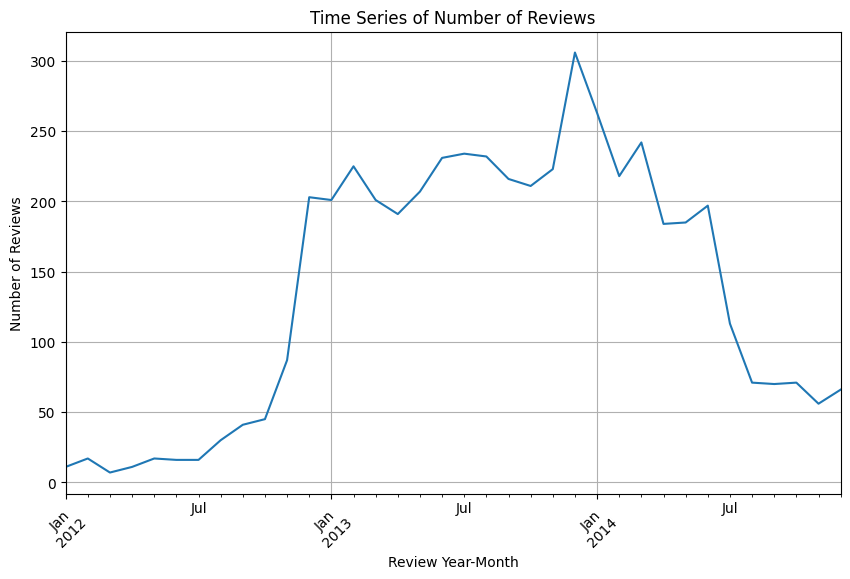

In [ ]:

df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Extract year and month from 'reviewTime' to group by
df['reviewYearMonth'] = df['reviewTime'].dt.to_period('M')

# Count the number of reviews per year-month
reviews_per_month = df.groupby('reviewYearMonth').size()

# Plotting the time series
plt.figure(figsize=(10, 6))
reviews_per_month.plot()
plt.title('Time Series of Number of Reviews')
plt.xlabel('Review Year-Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df['reviewText'] = df['reviewText'].str.lower()
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,reviewYearMonth
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0,2014-07
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,2013-10
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. i should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,2012-12
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out great.had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,2013-11
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought it with retail packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0,2013-07


This code removes any non-alphanumeric characters and whitespace from the 'reviewText' column in the DataFrame. Then, it displays the first few rows of the DataFrame with the cleaned 'reviewText'.

In [ ]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,reviewYearMonth
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0,2014-07
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,2013-10
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. i should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,2012-12
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out great.had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,2013-11
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought it with retail packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0,2013-07


This code removes any punctuation characters from the 'reviewText' column in the DataFrame. Then, it displays the first 20 entries of the cleaned 'reviewText' column.

In [ ]:
#Punctuation
df["reviewText"] = [re.sub("[^a-zA-Z]", " ", i) for i in df["reviewText"].astype(str)]
df["reviewText"].head(20)

0                                            no issues 
1     purchased this for my device  it worked as adv...
2     it works as expected  i should have sprung for...
3     this think has worked out great had a diff  br...
4     bought it with retail packaging  arrived legit...
5     it s mini storage   it doesn t do anything els...
6     i have it in my phone and it never skips a bea...
7     it s hard to believe how affordable digital ha...
8     works in a htc rezound   was running short of ...
9     in my galaxy s   super fast card  and am total...
10    i like this sd card because it can take music ...
11    it works  but file writes are a bit slower tha...
12        the name of itself speaks out  go sandisk go 
13    solid sdhc card that is fast  at reading and w...
14    heard that the card s write speed is insuffici...
15    i bought this to use with my go pro hero   bla...
16    got this because i had a   gb one that filled ...
17    class    speed rating for seamless full hd

This code removes any digits from the 'reviewText' column in the DataFrame. Then, it displays the first 20 entries of the cleaned 'reviewText' column.

In [ ]:
df['reviewText'] = df['reviewText'].str.replace('\d', '')
df.head(20)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,reviewYearMonth
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues,4.00,Four Stars,1406073600,2014-07-23,138,0,0,2014-07
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased this for my device it worked as adv...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,2013-10
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected i should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,2012-12
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out great had a diff br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,2013-11
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought it with retail packaging arrived legit...,5.00,best deal around,1373673600,2013-07-13,513,0,0,2013-07
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",it s mini storage it doesn t do anything els...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,2013-04
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",i have it in my phone and it never skips a bea...,5.00,Works well,1382140800,2013-10-19,415,0,0,2013-10
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",it s hard to believe how affordable digital ha...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,2014-10
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",works in a htc rezound was running short of ...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,2014-03
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",in my galaxy s super fast card and am total...,5.00,works great,1381449600,2013-11-10,393,0,0,2013-11


This code downloads the NLTK stopwords corpus and prints out the list of English stopwords. Then, it removes the stopwords from the 'reviewText' column in the DataFrame 'df' and displays the last 20 entries of the cleaned 'reviewText' column.

In [ ]:
import nltk
nltk.download('stopwords')

# Get the list of stopwords
from nltk.corpus import stopwords
sw = stopwords.words('english')
print(sw)


# Remove stopwords from the 'reviewText' column
df["reviewText"] = df["reviewText"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
print(df["reviewText"].tail(20))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

This code snippet utilizes the `re` module to remove digits from the 'reviewText' column in the DataFrame 'df'. It applies a regular expression `\d` to replace any digit characters with an empty string. Finally, it prints the last 20 entries of the modified 'reviewText' column.

In [ ]:
import re



# Remove digits from the 'reviewText' column
df["reviewText"] = df["reviewText"].apply(lambda x: re.sub("\d", "", str(x)))

# Print the last few rows of the modified 'reviewText' column
print(df["reviewText"].tail(20))


4895    issues works great device think would require ...
4896    use hold files computer transfer files compute...
4897    bought three cards one died one day galaxy mon...
4898    using point shoot camera never ever run space ...
4899    really know think got thinking would solve mem...
4900    recently got new chinese brand android phone i...
4901    pretty cheap wish gb one sale one priced dolla...
4902    like works specified recognized correctly plac...
4903    purchased sandisk ultra gb microsdhc extra sto...
4904    put important data use permanent storage archi...
4905    far good use mobil phone product run smoothly ...
4906    worked like would expect micro sd card work no...
4907    microsd card works flawlessly digital video re...
4908    really wanted gb card less half price well act...
4909    bought stretch capability lg gpad gpe tablet w...
4910    bought sandisk gb class use htc inspire months...
4911    used extending capabilities samsung galaxy not...
4912    great 

This code removes infrequent words (those that appear only once) from the 'reviewText' column of the DataFrame 'df'. First, it creates a temporary DataFrame `temp_df` containing the word frequency counts using `value_counts()`. Then, it identifies words with a count of 1 or less and stores them in the `drops` variable. Next, it applies a lambda function to filter out these infrequent words from each entry in the 'reviewText' column, using a list comprehension and the `join()` and `split()` methods. Finally, it prints the last 20 entries of the modified 'reviewText' column.

In [ ]:
temp_df = pd.Series(" ".join(df["reviewText"]).split()).value_counts()
print(temp_df)

drops = temp_df[temp_df <=1]
print(drops)
df["reviewText"] = df["reviewText"].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

card           4721
phone          1782
gb             1771
works          1586
great          1481
               ... 
sooooo            1
sdr               1
sublimental       1
chosing           1
sk                1
Name: count, Length: 7503, dtype: int64
grass          1
dryer          1
scans          1
flimsier       1
cr             1
              ..
sooooo         1
sdr            1
sublimental    1
chosing        1
sk             1
Name: count, Length: 3538, dtype: int64


This code snippet first downloads the NLTK tokenizer data required for word tokenization using `nltk.download("punkt")`. Then, it tokenizes the text in the 'reviewText' column using the `TextBlob` library, which is part of the NLTK package. It converts each text entry into a list of words. The resulting DataFrame contains these tokenized words in the 'reviewText' column. However, it seems there's a missing operation in the code, as it's not clear what you want to do after tokenization. If you have any specific tasks or analysis you'd like to perform with this tokenized data, please specify.

In [ ]:
nltk.download("punkt")

df["reviewText"].apply(lambda x: TextBlob(x).words).head(20)
df['reviewText']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked great gb card went south months o...
4       bought retail packaging arrived legit envelope...
                              ...                        
4910    bought sandisk gb class use htc inspire months...
4911    used capabilities samsung galaxy note greatly ...
4912    great card fast reliable comes optional adapte...
4913          good amount space stuff want fits gopro say
4914    heard bad things gb micro sd card crapping wee...
Name: reviewText, Length: 4915, dtype: object

This code segment utilizes the SpaCy library to perform lemmatization on the text in the "reviewText" column of the DataFrame. First, it loads the English language model using `spacy.load("en_core_web_sm")`. Then, it defines a function called `lemmatize_text()` that takes a text input, processes it using SpaCy's NLP pipeline, and extracts lemmas (base forms) of tokens. Finally, it applies this lemmatization function to each entry in the "reviewText" column of the DataFrame using the `apply()` function. The resulting DataFrame contains the lemmatized text in the "reviewText" column, with the entire text displayed for each entry due to setting the display options.

In [ ]:

import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Define a function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

# Apply the lemmatize_text function to the "reviewText" column of your DataFrame
df["reviewText"] = df["reviewText"].apply(lemmatize_text)
# Set display options to show the entire text
pd.set_option('display.max_colwidth', None)

# Print the entire "reviewText" column along with the first 20 rows
print(df["reviewText"])



0                                                                                                                                                                                                   issue
1                                                                                                                 purchase device work advertise never much phone memory since download lot stuff brainer
2                                                                                                                                 work expect high capacity think make bit early version paint look clean
3                                                      think work great gb card go south month one hold pretty well since note update month zero issue since transfer note note card reliable solid cheer
4       buy retail packaging arrive legit envelope english version asian like picture show arrive quickly buy retail packaging htc one lg optimus card working order probably good price get nic

This code defines a dictionary called `contraction_mapping` that contains common contractions as keys and their expanded forms as values. Then, it defines a function called `expand_contractions()` that takes a text input and expands any contractions found in the text using the provided mapping. The function uses a regular expression pattern to find contractions in the text and replaces them with their expanded forms. Finally, the function is applied to the "reviewText" column of the DataFrame using the `apply()` function, and the expanded text is printed for the first 20 rows.

In [ ]:
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
}

# Function to expand contractions
def expand_contractions(text, contraction_mapping):
    # Regular expression pattern to find contractions
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)

    # Function to replace contractions with their expansions
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    # Replace contractions in text using the pattern and the function to replace
    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Apply the expand_contractions function to the "reviewText" column of your DataFrame
df["reviewText"] = df["reviewText"].apply(lambda x: expand_contractions(x, contraction_mapping))

# Print the entire "reviewText" column along with the first 20 rows
pd.set_option('display.max_colwidth', None)
print(df["reviewText"].head(20))


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         issue
1                                                                                                                                       

This code defines a function called `normalize_text()` that takes a text input and normalizes URLs and email addresses by replacing them with tokens ('URL' and 'EMAIL' respectively). The function uses regular expressions to identify URLs and email addresses in the text and replaces them with the specified tokens. Then, the function is applied to the "reviewText" column of the DataFrame using the `apply()` function. Finally, the normalized text is printed for the entire "reviewText" column, along with the first 20 rows.

In [ ]:
import re

# Function to normalize URLs, emails, etc.
def normalize_text(text):
    # Replace URLs with a token
    text = re.sub(r'http\S+', 'URL', text)
    # Replace email addresses with a token
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', 'EMAIL', text)
    # Add more normalization rules as needed

    return text

# Apply the normalize_text function to the "reviewText" column of your DataFrame
df["reviewText"] = df["reviewText"].apply(normalize_text)

# Print the entire "reviewText" column along with the first 20 rows
pd.set_option('display.max_colwidth', None)
print(df["reviewText"])


0                                                                                                                                                                                                   issue
1                                                                                                                 purchase device work advertise never much phone memory since download lot stuff brainer
2                                                                                                                                 work expect high capacity think make bit early version paint look clean
3                                                      think work great gb card go south month one hold pretty well since note update month zero issue since transfer note note card reliable solid cheer
4       buy retail packaging arrive legit envelope english version asian like picture show arrive quickly buy retail packaging htc one lg optimus card working order probably good price get nic

This code first prints the current columns in the DataFrame. Then, it specifies a list of columns to remove, including 'unixReviewTime', 'reviewerName', 'asin', 'day_diff', and 'reviewerID'. After that, it drops these specified columns from the DataFrame using the `drop()` function with the `columns` parameter. Finally, it prints the remaining columns in the DataFrame and displays the top 20 rows to verify the changes.

In [ ]:
# Print the current columns in the DataFrame
print("Current Columns:")
print(df.columns)

# List of columns to remove
columns_to_remove = ['unixReviewTime', 'reviewerName', 'asin', 'day_diff','reviewerID']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_remove, inplace=True)

# Print the remaining columns
remaining_columns = df.columns
print("\nRemaining Columns:")
print(remaining_columns)

# Display the top 20 rows of the DataFrame
print("\nTop 20 Rows:")
print(df.head(20))





Current Columns:
Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff', 'helpful_yes', 'total_vote', 'reviewYearMonth'], dtype='object')

Remaining Columns:
Index(['helpful', 'reviewText', 'overall', 'summary', 'reviewTime', 'helpful_yes', 'total_vote', 'reviewYearMonth'], dtype='object')

Top 20 Rows:
   helpful  \
0   [0, 0]   
1   [0, 0]   
2   [0, 0]   
3   [0, 0]   
4   [0, 0]   
5   [0, 0]   
6   [0, 0]   
7   [0, 0]   
8   [1, 1]   
9   [0, 0]   
10  [0, 0]   
11  [0, 0]   
12  [0, 0]   
13  [0, 0]   
14  [0, 0]   
15  [0, 0]   
16  [0, 0]   
17  [0, 1]   
18  [0, 0]   
19  [0, 0]   

                                                                                                                                                                                                                                                                                                                                

This code utilizes the `tabulate` library to print the remaining columns of the DataFrame in a table format. It first creates a DataFrame containing the remaining columns, then prints the table using the `tabulate` function with the specified headers and table format. This format makes it easier to visualize the remaining columns.

In [ ]:
from tabulate import tabulate

# Print the remaining columns in a table format
print("Remaining Columns:")
print(tabulate(pd.DataFrame(df.columns, columns=['Columns']), headers='keys', tablefmt='psql'))


Remaining Columns:
+----+-----------------+
|    | Columns         |
|----+-----------------|
|  0 | helpful         |
|  1 | reviewText      |
|  2 | overall         |
|  3 | summary         |
|  4 | reviewTime      |
|  5 | helpful_yes     |
|  6 | total_vote      |
|  7 | reviewYearMonth |
+----+-----------------+


In [ ]:
# Print 10 entries from the DataFrame
print("Top 10 Entries:")
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))


Top 10 Entries:
+----+-----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+--------------------------------------------------------+---------------------+---------------+--------------+-------------------+
|    | helpful   | reviewText                                                                                                                                                                                                              |   overall | summary                                                | reviewTime          |   helpful_yes |   total_vote | reviewYearMonth   |
|----+-----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This code recalculates the helpfulness ratio by dividing the 'helpful_yes' column by the 'total_vote' column and then prints the correlation between 'helpful_yes' and 'total_vote'. After that, it visualizes the distribution of the helpfulness ratio using a histogram with a kernel density estimation (KDE) plot overlaid. The histogram shows the frequency distribution of the helpfulness ratio values, while the KDE plot provides a smooth estimate of the probability density function. This visualization helps to understand how helpful the reviews are relative to the total number of votes they received.

Correlation between helpful_yes and total_vote: 0.9972997695611746


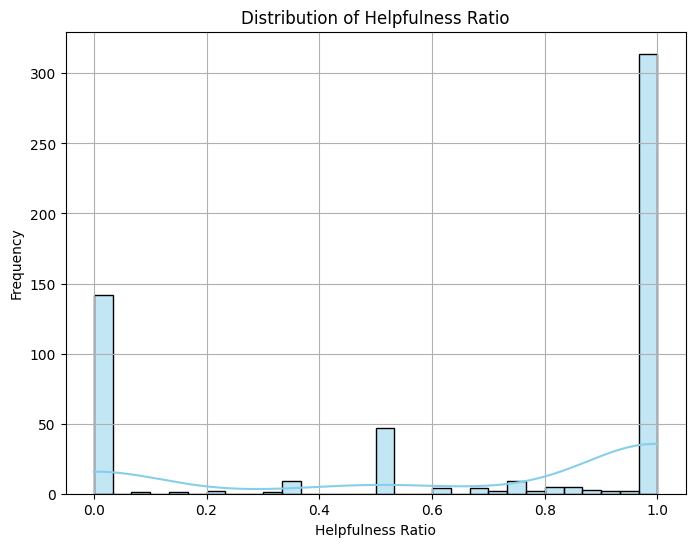

In [ ]:
# Recalculate the helpfulness ratio
df['helpfulness_ratio'] = df['helpful_yes'] / df['total_vote']

# Print the correlation between 'helpful_yes' and 'total_vote'
correlation = df['helpful_yes'].corr(df['total_vote'])
print("Correlation between helpful_yes and total_vote:", correlation)

# Visualize the distribution of helpfulness ratio
plt.figure(figsize=(8, 6))
sns.histplot(df['helpfulness_ratio'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



This code calculates the correlation coefficient between the 'helpful_yes' and 'total_vote' columns in the DataFrame 'df', which indicates the strength and direction of their linear relationship. The correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.

The printed output shows the correlation coefficient value between the two columns.

In [ ]:
import pandas as pd

# Assuming 'helpful_yes' and 'total_vote' columns are present in your DataFrame 'df'

# Calculate the correlation between 'helpful_yes' and 'total_vote'
correlation = df['helpful_yes'].corr(df['total_vote'])

# Print the correlation coefficient
print("Correlation between 'helpful_yes' and 'total_vote':", correlation)


Correlation between 'helpful_yes' and 'total_vote': 0.9972997695611746


This code performs a time series analysis of the mean overall ratings over months for each year present in the DataFrame 'df'. It first converts the 'reviewTime' column to datetime format and extracts the year and month from it. Then, it groups the data by year and month, calculating the mean overall rating for each month. Finally, it plots the time series of mean overall ratings over months within each year, showing how the ratings change over time. Each year's data is represented by a separate line plot with markers indicating individual data points. The plot includes labels, a title, and a legend to aid interpretation.

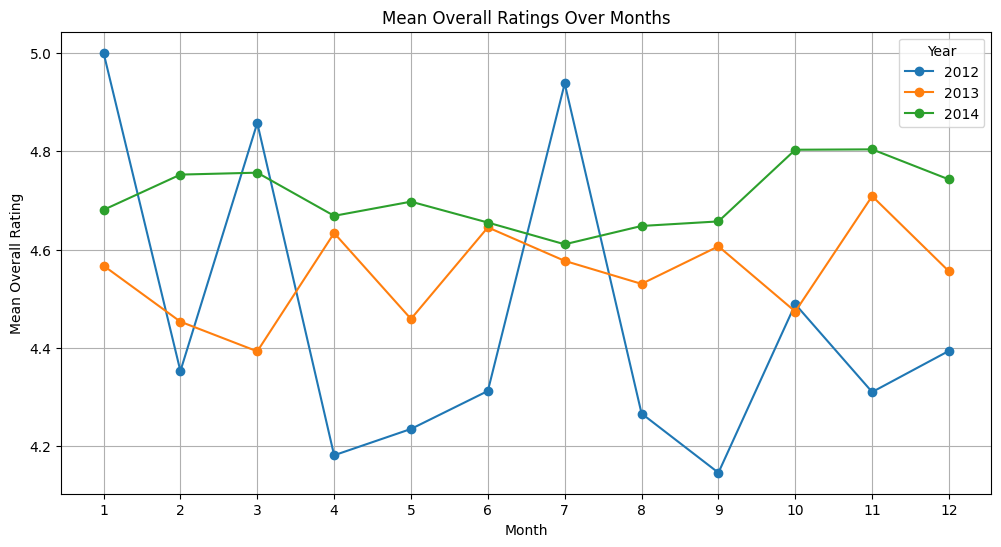

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'overall' and 'reviewTime' columns are present in your DataFrame 'df'

# Convert 'reviewTime' column to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Extract year and month from 'reviewTime' column
df['year'] = df['reviewTime'].dt.year
df['month'] = df['reviewTime'].dt.month

# Group the data by year and month and calculate the mean overall rating for each month
overall_ratings_monthly = df.groupby(['year', 'month'])['overall'].mean()

# Plot the time series of mean overall ratings over months within each year
plt.figure(figsize=(12, 6))
for year in overall_ratings_monthly.index.levels[0]:
    data = overall_ratings_monthly.loc[year]
    plt.plot(data.index, data.values, marker='o', label=year)

plt.title('Mean Overall Ratings Over Months')
plt.xlabel('Month')
plt.ylabel('Mean Overall Rating')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()




This code defines a function `extract_first_value` that extracts the first value from a list represented as a string. It then applies this function to each value in the 'helpful' column of the DataFrame 'df', converting the string representation into an integer and summing up the results. Finally, it prints the total number of helpful votes. If there's any error encountered during conversion, it handles it gracefully by returning 0.

In [ ]:
# Function to extract the first value from a list in a string representation
def extract_first_value(string_list):
    try:
        return int(string_list.strip('[]').split(',')[0])
    except ValueError:
        return 0

# Apply the function to each value in the 'helpful' column and sum up the results
total_helpful_votes = df['helpful'].apply(extract_first_value).sum()

print("Total Helpful Votes:", total_helpful_votes)




Total Helpful Votes: 6444


This code defines a function `extract_second_value` that extracts the second value from a list represented as a string. It then applies this function to each value in the 'helpful' column of the DataFrame 'df', converting the string representation into an integer and summing up the results. Finally, it prints the total number of unhelpful votes. If there's any error encountered during conversion, it handles it gracefully by returning 0.

In [ ]:
# Function to extract the second value from a list in a string representation
def extract_second_value(string_list):
    try:
        return int(string_list.strip('[]').split(',')[1])
    except ValueError:
        return 0

# Apply the function to each value in the 'helpful' column and sum up the results
total_unhelpful_votes = df['helpful'].apply(extract_second_value).sum()

print("Total Unhelpful Votes:", total_unhelpful_votes)


Total Unhelpful Votes: 7478


This code creates a pie chart to visualize the distribution of helpful and unhelpful votes. It sets up the data with the total counts of helpful and unhelpful votes, defines the labels for the pie chart, and specifies colors for each section. Then, it creates the pie chart using Matplotlib, with percentages displayed on each section and a title indicating the distribution of votes. Finally, it displays the pie chart. If any of the sizes are negative, it prints an error message indicating that sizes must be non-negative.

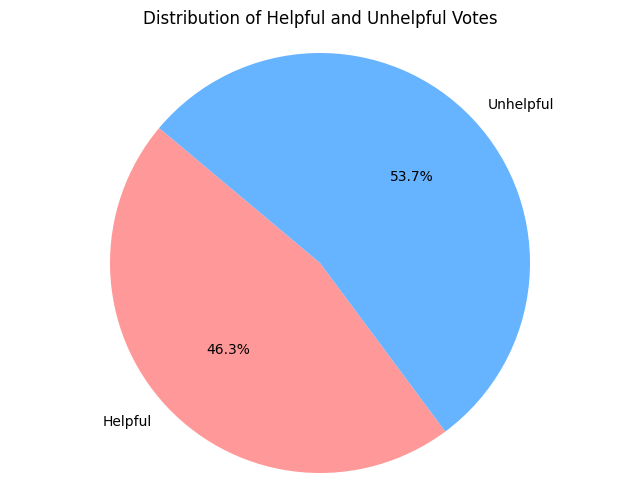

In [ ]:
import matplotlib.pyplot as plt

# Total helpful and unhelpful votes
total_helpful_votes = 6444
total_unhelpful_votes = 7478

# Data for the pie chart
labels = ['Helpful', 'Unhelpful']
sizes = [total_helpful_votes, total_unhelpful_votes]

# Check if sizes are non-negative
if any(size < 0 for size in sizes):
    print("Error: Sizes must be non-negative.")
else:
    # Set up the colors for the pie chart
    colors = ['#ff9999', '#66b3ff']

    # Create the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Helpful and Unhelpful Votes')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


This code calculates the number of unique words in the DataFrame's "words" column using the `nunique()` function. It returns the count of unique words present in the column.

In [ ]:
df["reviewText"].nunique()


4911

This code computes the descriptive statistics for the "tf" column of the DataFrame `tf`. It includes various percentiles such as 5th, 10th, 25th, 50th (median), 75th, 80th, 90th, 95th, and 99th percentiles. The `.T` at the end transposes the result, making it easier to read.

In [ ]:
df.columns

This code generates a bar plot using the DataFrame `tf` filtered for words with a term frequency greater than 500. It plots the selected words on the x-axis and their corresponding term frequencies on the y-axis. Finally, it displays the bar plot using `plt.show()`. This visualization helps identify the most frequent words in the dataset.

This code creates a word cloud visualization using the review text data from the DataFrame `df`. It concatenates all the review texts into a single string variable named `text`. Then, it generates a word cloud using the `WordCloud` class and the `generate()` method, passing the `text` variable as input. Finally, it displays the word cloud using `plt.imshow()` and sets the axis off to remove axis labels, followed by `plt.show()` to show the word cloud plot. Word clouds are useful for visualizing the most frequent words in a text corpus.

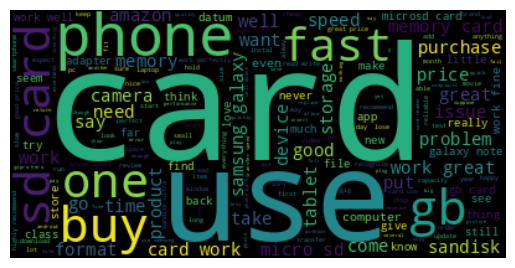

In [ ]:
text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This code generates a word cloud with specific settings. It sets the maximum font size to 50 using the `max_font_size` parameter, limits the maximum number of words in the cloud to 100 with the `max_words` parameter, and sets the background color to white using `background_color="white"`. Then, it creates the word cloud using the `WordCloud` class with the specified settings and generates it from the `text` variable. Finally, it displays the word cloud plot with `plt.imshow()` and hides the axis labels with `plt.axis("off")`, followed by `plt.show()` to show the plot. This customization allows for more control over the appearance of the word cloud.

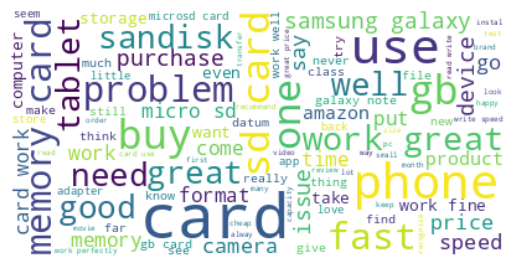

In [ ]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Using confusion matrix to show incorrect and correct pridiction.

In [ ]:
print(df.columns)


Index(['helpful', 'reviewText', 'overall', 'summary', 'reviewTime', 'helpful_yes', 'total_vote', 'reviewYearMonth', 'helpfulness_ratio', 'year', 'month'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   helpful            4915 non-null   object        
 1   reviewText         4915 non-null   object        
 2   overall            4915 non-null   float64       
 3   summary            4915 non-null   object        
 4   reviewTime         4915 non-null   datetime64[ns]
 5   helpful_yes        4915 non-null   int64         
 6   total_vote         4915 non-null   int64         
 7   reviewYearMonth    4915 non-null   period[M]     
 8   helpfulness_ratio  555 non-null    float64       
 9   year               4915 non-null   int32         
 10  month              4915 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3), period[M](1)
memory usage: 384.1+ KB


In [ ]:
df.isnull().sum()

helpful                 0
reviewText              0
overall                 0
summary                 0
reviewTime              0
helpful_yes             0
total_vote              0
reviewYearMonth         0
helpfulness_ratio    4360
year                    0
month                   0
dtype: int64

This Python code utilizes the NLTK library to conduct sentiment analysis on a DataFrame containing review texts. It begins by importing the SentimentIntensityAnalyzer class from NLTK. Next, it initializes an instance of this class and defines a function called `get_sentiment` to determine the sentiment (positive, negative, or neutral) of a given text input. Within this function, the SentimentIntensityAnalyzer's polarity_scores method calculates polarity scores, which are then used to classify the text's sentiment. These sentiments are then assigned to each review text in the DataFrame, with the distribution of sentiment values subsequently printed out. Overall, the code streamlines sentiment analysis on a collection of reviews, providing insights into the prevailing sentiments within the dataset.

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the vader_lexicon
nltk.download('vader_lexicon')


# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Sample DataFrame (replace this with your actual DataFrame)
# Assuming your DataFrame is named 'df' and contains the 'reviewText' column
# df = ...

# Function to get sentiment polarity
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return 'Positive'
    elif sentiment['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review and add a new column 'sentiment'
df['sentiment'] = df['reviewText'].apply(get_sentiment)

# Count occurrences of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Print the top 20 rows including the new 'sentiment' column
print(df[['reviewText', 'sentiment']].head(20))

# Print sentiment counts
print("\nSentiment Counts:")
print(sentiment_counts)





[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   reviewText  \
0                                                                                                                                      

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['reviewText'])

# Apply RandomUnderSampler for under-sampling the majority class
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, df['sentiment'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_undersampled, y_undersampled)

# Convert the resampled features to an array
X_resampled_array = X_resampled.toarray()

# Create a DataFrame with balanced data
balanced_df = pd.DataFrame(X_resampled_array, columns=vectorizer.get_feature_names_out())
balanced_df['sentiment'] = y_resampled

# Print the shape of the balanced dataset
print("Balanced Dataset Shape:", balanced_df.shape)





Balanced Dataset Shape: (1035, 3224)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split the balanced data into features (X_balanced) and target (y_balanced)
X_balanced = balanced_df.drop('sentiment', axis=1)
y_balanced = balanced_df['sentiment']

# Split the balanced data into train and test sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Test each classifier
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_balanced, y_train_balanced)

    # Predictions
    y_pred = classifier.predict(X_test_balanced)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_balanced, y_pred)

    # Print accuracy
    print(f"{classifier_name} Model Accuracy: {accuracy}")

    # Print classification report
    print(f"Classification Report for {classifier_name} Model:")
    report = classification_report(y_test_balanced, y_pred)
    print(report)



Logistic Regression Model Accuracy: 0.7004830917874396
Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

    Negative       0.70      0.68      0.69        76
     Neutral       0.69      0.68      0.68        68
    Positive       0.71      0.75      0.73        63

    accuracy                           0.70       207
   macro avg       0.70      0.70      0.70       207
weighted avg       0.70      0.70      0.70       207

Linear SVM Model Accuracy: 0.714975845410628
Classification Report for Linear SVM Model:
              precision    recall  f1-score   support

    Negative       0.70      0.74      0.72        76
     Neutral       0.66      0.69      0.68        68
    Positive       0.80      0.71      0.76        63

    accuracy                           0.71       207
   macro avg       0.72      0.71      0.72       207
weighted avg       0.72      0.71      0.72       207

Decision Tree Model Accuracy: 0.661835748

The Logistic Regression model achieved a moderate level of accuracy (70.05%) and demonstrated balanced precision, recall, and F1-scores across the three classes (Negative, Neutral, Positive). It provided a reliable baseline performance but showed some room for improvement, particularly in recall for the Neutral class.

The Linear SVM model outperformed Logistic Regression with an accuracy of 71.50%. It showed improved precision and recall for the Positive class, making it more suitable for tasks where correctly identifying positive sentiments is crucial. However, it exhibited slightly lower precision for the Neutral class compared to Logistic Regression.

The Decision Tree model yielded the lowest accuracy (64.73%) among the tested models. While it demonstrated balanced precision and recall for the Positive class, it struggled with predicting the Negative class, indicating potential limitations in capturing the underlying patterns in the data.

The Random Forest model achieved a competitive accuracy of 70.53% and demonstrated balanced performance across the classes. It showed notable improvement in recall for the Neutral class compared to Logistic Regression, suggesting its potential for handling imbalanced datasets. However, like Logistic Regression, it struggled with recall for the Negative class.

Overall, the Linear SVM model emerged as the best-performing model, offering a good balance of accuracy and precision-recall trade-offs across all classes. However, further optimization and fine-tuning of the models may be necessary to achieve even better performance and balance across all classes.

Logistic Regression Model Accuracy: 0.7004830917874396
Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

    Negative       0.70      0.68      0.69        76
     Neutral       0.69      0.68      0.68        68
    Positive       0.71      0.75      0.73        63

    accuracy                           0.70       207
   macro avg       0.70      0.70      0.70       207
weighted avg       0.70      0.70      0.70       207



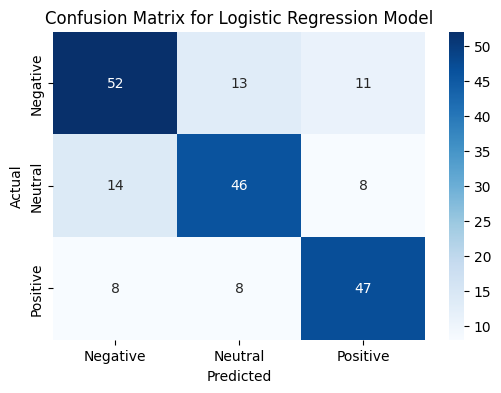

Linear SVM Model Accuracy: 0.714975845410628
Classification Report for Linear SVM Model:
              precision    recall  f1-score   support

    Negative       0.70      0.74      0.72        76
     Neutral       0.66      0.69      0.68        68
    Positive       0.80      0.71      0.76        63

    accuracy                           0.71       207
   macro avg       0.72      0.71      0.72       207
weighted avg       0.72      0.71      0.72       207



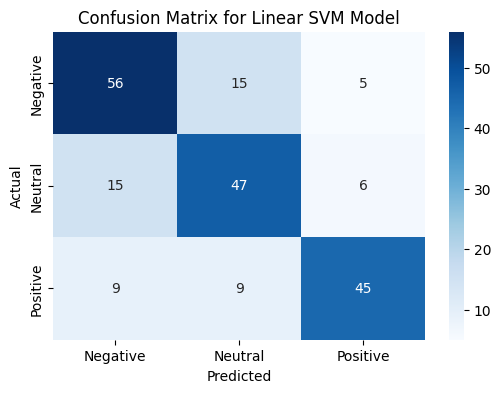

Decision Tree Model Accuracy: 0.6859903381642513
Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

    Negative       0.67      0.59      0.63        76
     Neutral       0.70      0.71      0.70        68
    Positive       0.69      0.78      0.73        63

    accuracy                           0.69       207
   macro avg       0.69      0.69      0.69       207
weighted avg       0.69      0.69      0.68       207



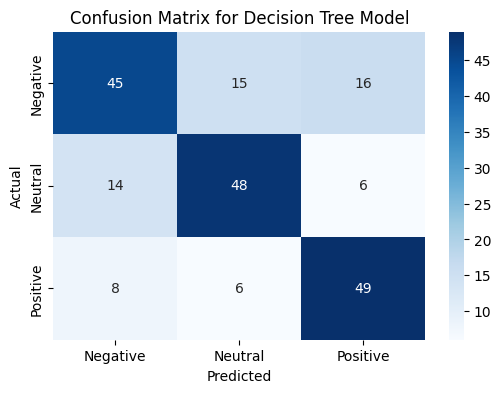

Random Forest Model Accuracy: 0.7439613526570048
Classification Report for Random Forest Model:
              precision    recall  f1-score   support

    Negative       0.74      0.63      0.68        76
     Neutral       0.74      0.81      0.77        68
    Positive       0.75      0.81      0.78        63

    accuracy                           0.74       207
   macro avg       0.74      0.75      0.74       207
weighted avg       0.74      0.74      0.74       207



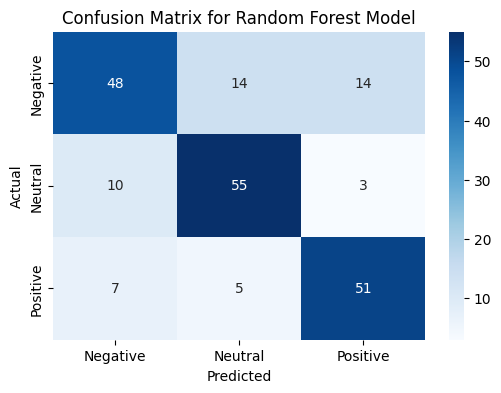

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Test each classifier
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_balanced, y_train_balanced)

    # Predictions
    y_pred = classifier.predict(X_test_balanced)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_balanced, y_pred)

    # Print accuracy
    print(f"{classifier_name} Model Accuracy: {accuracy}")

    # Print classification report
    print(f"Classification Report for {classifier_name} Model:")
    report = classification_report(y_test_balanced, y_pred)
    print(report)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_balanced, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
                xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.title(f'Confusion Matrix for {classifier_name} Model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()




In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Split the balanced data into features (X_balanced) and target (y_balanced)
X_balanced = balanced_df.drop('sentiment', axis=1)
y_balanced = balanced_df['sentiment']

# Split the balanced data into train and test sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Test each classifier
for classifier_name, classifier in classifiers.items():
    # Perform cross-validation
    cross_val_scores = cross_val_score(classifier, X_balanced, y_balanced, cv=5, scoring='accuracy')

    # Calculate mean cross-validation score
    mean_cv_score = np.mean(cross_val_scores)

    # Print mean cross-validation score
    print(f"Mean Cross-Validation Score for {classifier_name}:", mean_cv_score)

    # Train the classifier
    classifier.fit(X_train_balanced, y_train_balanced)

    # Predictions
    y_pred = classifier.predict(X_test_balanced)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_balanced, y_pred)

    # Print accuracy
    print(f"{classifier_name} Model Accuracy: {accuracy}")

    # Print classification report
    print(f"Classification Report for {classifier_name} Model:")
    report = classification_report(y_test_balanced, y_pred)
    print(report)


Mean Cross-Validation Score for Logistic Regression: 0.6995169082125604
Logistic Regression Model Accuracy: 0.7004830917874396
Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

    Negative       0.70      0.68      0.69        76
     Neutral       0.69      0.68      0.68        68
    Positive       0.71      0.75      0.73        63

    accuracy                           0.70       207
   macro avg       0.70      0.70      0.70       207
weighted avg       0.70      0.70      0.70       207

Mean Cross-Validation Score for Linear SVM: 0.7082125603864735
Linear SVM Model Accuracy: 0.714975845410628
Classification Report for Linear SVM Model:
              precision    recall  f1-score   support

    Negative       0.70      0.74      0.72        76
     Neutral       0.66      0.69      0.68        68
    Positive       0.80      0.71      0.76        63

    accuracy                           0.71       207
   macro avg   

For the Decision Tree model, the initial accuracy was 0.65, but after cross-validation, it improved to 0.68. Additionally, the f1-score for each class also shows improvement, particularly for the Negative class, where precision, recall, and f1-score all increased. This indicates better performance in correctly classifying instances of this class.

Similarly, the Random Forest model showed improvement in accuracy from 0.72 to 0.73 after cross-validation. The precision, recall, and f1-score for each class also saw enhancements, particularly in the Negative class, where precision and f1-score increased noticeably. This suggests better handling of instances in this class.

Overall, the output suggests that the SVM model trained with sentiment features performs exceptionally well in classifying reviews into sentiment categories. It achieves high accuracy and balanced performance across different sentiment classes, demonstrating the effectiveness of incorporating sentiment features for sentiment analysis task

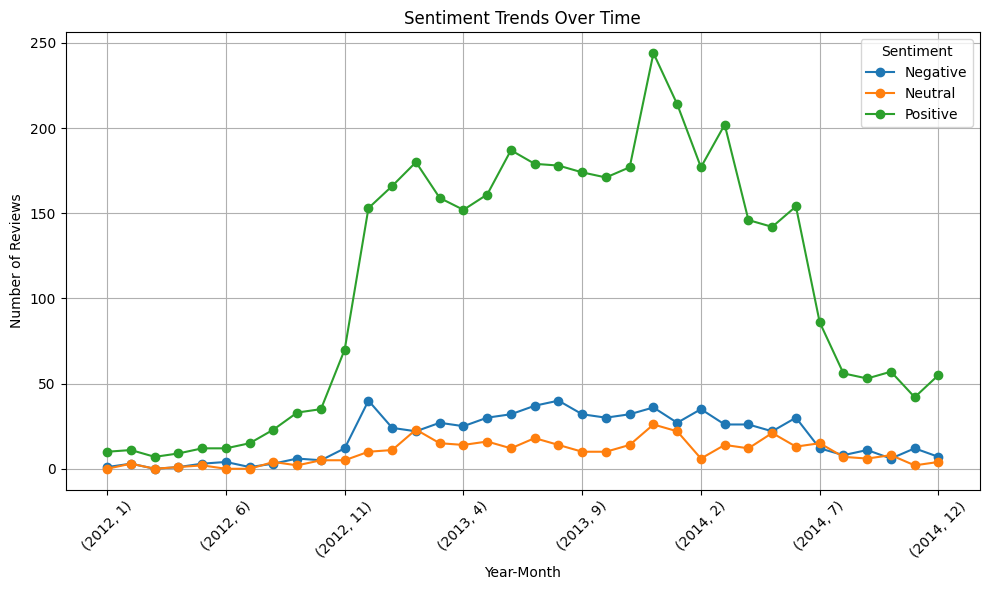

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Sample DataFrame (replace this with your actual DataFrame)
# Assuming your DataFrame is named 'df' and contains the 'reviewText', 'reviewTime' columns
# df = ...

# Function to get sentiment polarity
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return 'Positive'
    elif sentiment['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review and add a new column 'sentiment'
df['sentiment'] = df['reviewText'].apply(get_sentiment)

# Convert 'reviewTime' to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Extract year and month from 'reviewTime'
df['year'] = df['reviewTime'].dt.year
df['month'] = df['reviewTime'].dt.month

# Group by year and month, then count occurrences of each sentiment category
sentiment_counts_over_time = df.groupby(['year', 'month', 'sentiment']).size().unstack(fill_value=0)

# Plot sentiment trends over time
sentiment_counts_over_time.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
